# Vier
62070505201</br>
62070505203</br>
62070505208</br>
62070505215</br>
62070505230 </br>





In [ ]:
#Change the path to where you put the file
#%run  /Users/peerapon/iCloud/jupyter-libs/load-packages.ipynb
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

#%matplotlib notebook # Lead to interactive plots embedded within the notebook
%matplotlib inline  
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pd.options.plotting.backend = "plotly" 
#Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)

Numpy version 1.21.5
Pandas version 1.3.5
Seaborn version 0.11.2


In [ ]:
import numpy as np


## Part 3 Homework 1
#### 1. From the data matrix below
#### a) Compute the mean vector and covariance matrix.

[[  8 -20]
 [  0  -1]
 [ 10 -19]
 [ 10 -20]
 [  2   0]]
[[ 2. -8.]
 [-6. 11.]
 [ 4. -7.]
 [ 4. -8.]
 [-4. 12.]]


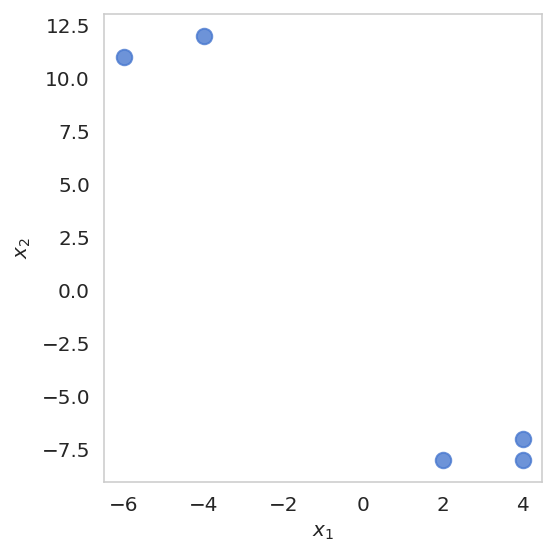

In [ ]:
x1 = np.array([8,0,10,10,2])
x2 = np.array([-20,-1,-19,-20,0])
D = np.vstack((x1,x2)).T # Or D = np.stack((x1,x2), axis=1)
print(D)

# Center the data to zero mean.
X = D - D.mean(axis=0, keepdims=True)
print(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1],marker='o',s=60, alpha=0.8);
plt.xlabel('$x_1$'); plt.ylabel('$x_2$');
plt.tight_layout();

In [ ]:
# compute the sample covariance matrix from the zero-mean data
Z = np.cov(X, rowvar=False)
print(Z)

[[ 22.  -47.5]
 [-47.5 110.5]]


b) Determine the eigenpairs of the covariance matrix.

In [ ]:
# Compute the eigenpairs of the covariance matrix to get PCs
egval,egvec = np.linalg.eig(Z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)

Eigenvalues: 
 [131.16773641   1.33226359]
Eigenvectors: 
 [[ 0.39897876 -0.91696017]
 [-0.91696017 -0.39897876]]


c) Compute the first principal component

In [ ]:
r=1
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

Principal components: 
 [[ 0.39897876]
 [-0.91696017]]


#### 2. From the sample covariance matrix below,
#### (a) What is the dimension of the dataset?


In [ ]:
X=[[0.6857,-0.0393,1.2737,0.5169],[-0.0393,0.1880,-0.3217,-0.1180],[1.2737 ,-0.3217 ,3.1132 ,1.2964],[0.5169 ,-0.1180,1.2964,0.5824]]
X = pd.DataFrame(X)
print(X)
X.shape

        0       1       2       3
0  0.6857 -0.0393  1.2737  0.5169
1 -0.0393  0.1880 -0.3217 -0.1180
2  1.2737 -0.3217  3.1132  1.2964
3  0.5169 -0.1180  1.2964  0.5824


(4, 4)

(b) How much of the total variance is explained by the first principal component ?
### ANS = Component 1: 92.46%

In [ ]:
# sort these based on the eigenvalues
egval,egvec = np.linalg.eig(X)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]
print("Eigenvalues: \n", egval)
print("Eigenvectors: \n", egvec)
r=1
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Eigenvalues: 
 [4.2248737  0.24220996 0.07853306 0.02368328]
Eigenvectors: 
 [[ 0.36159133 -0.65654789 -0.58109499  0.31705707]
 [-0.08226989 -0.72970385  0.5966075  -0.32376449]
 [ 0.85657192  0.17572902  0.0727271  -0.47970264]
 [ 0.35884247  0.07480952  0.54872477  0.7513566 ]]
Component 1: 92.46%
All 1 components: 92.5%


(c) For a datapoint x = [5.8 2.7 5.1 1.9], what is the reduced dimension data by using the first two principal
components?
### ANS = [[ 6.9254 -4.7398]]

In [ ]:
X=[[5.8 ,2.7, 5.1, 1.9]]
r=2
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)

X_pca = X @ Pr
print("Transformed data: \n", X_pca)

Principal components: 
 [[ 0.36159133 -0.65654789]
 [-0.08226989 -0.72970385]
 [ 0.85657192  0.17572902]
 [ 0.35884247  0.07480952]]
Transformed data: 
 [[ 6.92541853 -4.7398221 ]]


(d) What is the reconstructed data point of the transformed data in (c) ?

In [ ]:
X_pca @ Pr.transpose()

array([[5.61609153, 2.88891306, 5.09919479, 2.13055043]])

#### 3. (15 points) The dataset MTCARS contains data from 32 records and 11 features about cars,
#### (a) Determine the amount of variation explained by each principal component.


In [ ]:
# Load data from 'MTCARS' sheet in L01-dimensionality-reduction.xlsx
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data1 = pd.read_excel('/content//gdrive/MyDrive/L01-dimensionality-reduction.xlsx',sheet_name='MTCARS')
data1 = data1.apply(lambda x: x - data1.mean(),axis=1 )

In [ ]:
Z = np.cov(data1, rowvar=False)


In [ ]:
# Compute the eigenpairs of the covariance matrix to get PCs
egval,egvec = np.linalg.eig(Z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]

r=11
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)
X_pca = data1 @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 3.81181985e-02 -9.18484655e-03  9.82070847e-01  4.76347838e-02
  -8.83284292e-02 -1.43790084e-01 -3.92391738e-02  2.27104005e-02
   2.79013881e-03  3.06303615e-02 -1.58569365e-02]
 [-1.20351498e-02  3.37248716e-03 -6.34839420e-02 -2.27991962e-01
   2.38725898e-01 -7.93818050e-01  4.25011021e-01 -1.89040332e-01
  -4.26772061e-02  1.31718534e-01  1.45445363e-01]
 [-8.99568146e-01 -4.35372320e-01  3.14426562e-02 -5.08682642e-03
  -1.07359688e-02  7.42413761e-03  5.82397980e-04 -5.84146399e-04
  -3.53271286e-03 -5.39913212e-03  9.42026215e-04]
 [-4.34784387e-01  8.99307303e-01  2.50930486e-02  3.57156383e-02
   1.65519386e-02  1.65368455e-03 -2.21253798e-03  4.74808678e-06
   3.73408459e-03  1.86255377e-03 -2.15261018e-03]
 [ 2.66007737e-03  3.90020536e-03  3.97249277e-02 -5.71293572e-02
  -1.33327645e-01  2.27229260e-01  3.48474105e-02 -9.38581717e-01
   1.41311095e-02  1.84102094e-01 -9.73818815e-02]
 [-6.23940543e-03 -4.86102295e-03 -8.49102579e-02  1.27962867

(b) How many PCs are sufficient to explain at least 90% of the total variation in the data ?


## ANS 1 PC : Component 1: 92.70%


(c) Which of the original features get large weights in PC1 ?


## ANS feature 3


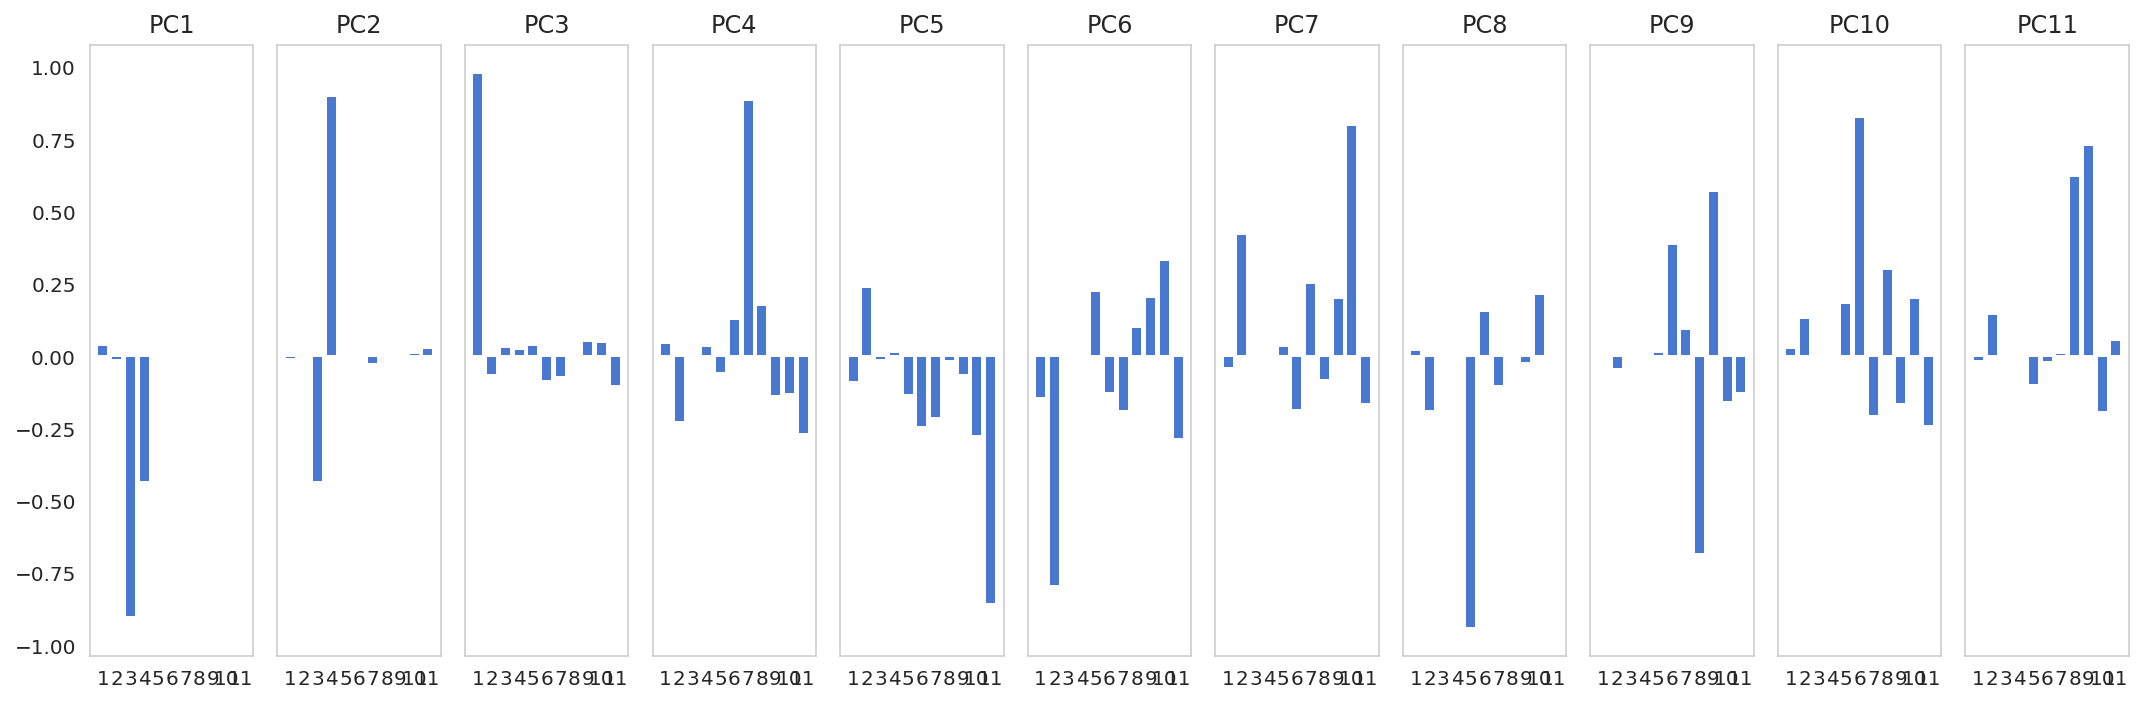

In [ ]:
r=11
org_dim = data1.shape[1]
f,ax = plt.subplots(1,r,sharey=True , figsize=(15,5))
for i in range(r):
  ax[i].bar(list(map(str,range(1,org_dim+1))),egvec[:,i])
  ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();

(d) Proprocess the input by centering and standardizing (dividing by standard deviation) the variables. Then, apply PCA
to repeat (a) - (c). Do the PCA outputs differ significantly between standardizing and not standardizing the dataset before applying PCA? Explain the results.

## ANS จากการ proprocess input โดยการเพิ่มการหารด้วย ค่าsd ทำให้ ค่า variation explained ของแต่ละ principal component เปลี่ยนไปและจำนวน PC ( at least 90% )เพิ่มขึ้นเป็น 4  และ features get large weights ในแต่ละ PC ต่างออกไป

In [ ]:
data2 = data1.apply(lambda x: (x - data1.mean())/data1.std(),axis=1 )
Z = np.cov(data2, rowvar=False)


In [ ]:
# Compute the eigenpairs of the covariance matrix to get PCs
egval,egvec = np.linalg.eig(Z)

egvec = egvec[:,np.argsort(-egval)]
egval = egval[np.argsort(-egval)]


In [ ]:
r=11
Pr = egvec[:,0:r]
print("Principal components: \n", Pr)
X_pca = data1 @ Pr
print("Transformed data: \n", X_pca)

# Total variation explained by the first r PCs
for i in range(r):
  print("Component {}: {:.2f}%".format(i+1, egval[i]*100/sum(egval)))

print("All {} components: {:.1f}%".format(r, sum(egval[:r])*100/sum(egval)))

Principal components: 
 [[ 0.3625305  -0.0161244   0.22574419 -0.02254025  0.10284468  0.10879743
  -0.36772381  0.75409142  0.23570162  0.13928524  0.12489563]
 [-0.37391603 -0.04374371  0.17531118 -0.00259184  0.05848381 -0.16855369
  -0.05727774  0.23082493  0.05403527 -0.84641949  0.14069544]
 [-0.3681852   0.04932413  0.06148414  0.25660788  0.3939953   0.33616451
  -0.21430308 -0.00114213  0.19842785  0.04937979 -0.66060648]
 [-0.33005692 -0.24878402 -0.14001476 -0.06767616  0.54004744 -0.07143563
   0.00149599  0.22235844 -0.57583007  0.24782351  0.25649206]
 [ 0.29415138 -0.27469408 -0.16118879  0.85482874  0.07732727 -0.24449705
  -0.02111986 -0.0321935  -0.04690123 -0.10149369  0.03953025]
 [-0.34610332  0.14303825 -0.34181851  0.24589931 -0.07502912  0.46493964
   0.0206683   0.00857193  0.35949825  0.09439426  0.5674487 ]
 [ 0.20045635  0.46337482 -0.40316904  0.06807653 -0.16466591  0.33048032
  -0.05001052  0.23184002 -0.52837719 -0.27067295 -0.18136178]
 [ 0.30651132  0.


## ANS 4 PCs at least 90% of the total variation in the data 
### : Component 1: 60.08% Component 2: 24.10% Component 3: 5.70% Component 4: 2.45% 
### total variation = 92.33%

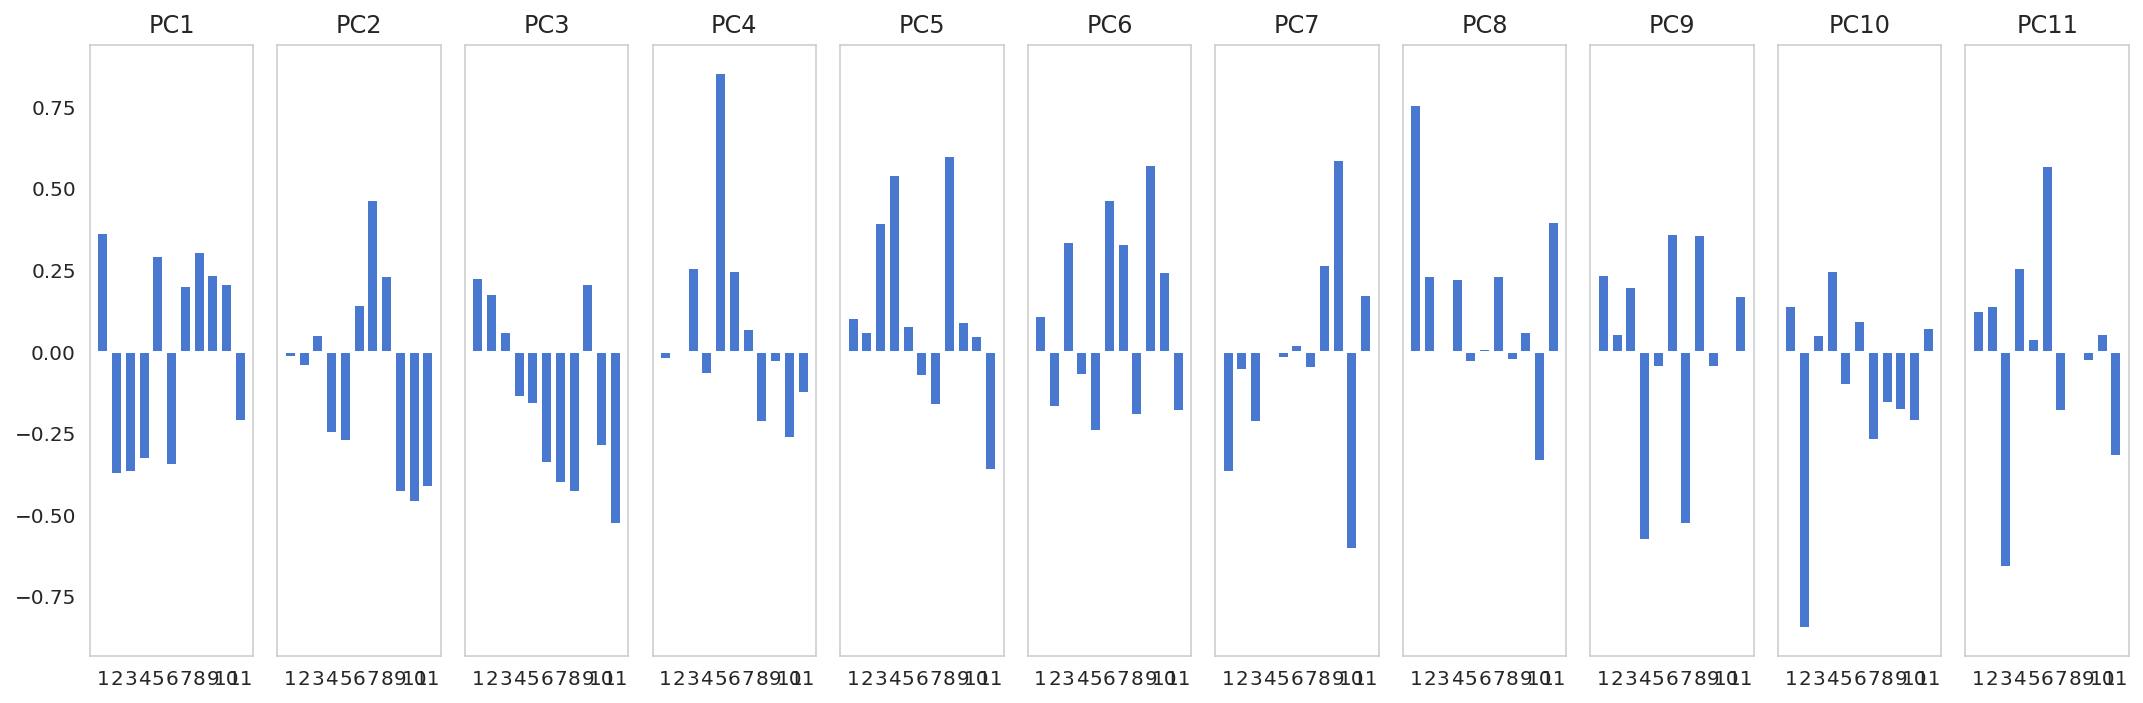

In [ ]:
r=11
org_dim = data2.shape[1]
f,ax = plt.subplots(1,r,sharey=True , figsize=(15,5))
for i in range(r):
  ax[i].bar(list(map(str,range(1,org_dim+1))),egvec[:,i])
  ax[i].set_title('PC{}'.format(i+1))
plt.tight_layout();